In [1]:
#библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV

# Загрузка данных
data = pd.read_csv('train.csv')

In [2]:
# Информация по данным

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 457.8+ MB


In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
#Проверка на повторы и их удаление, количество строк и столбцов
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.shape

(5000000, 12)

In [5]:
#Проверка на нулевые значения
missing_values = data.isnull().sum()
missing_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

1. Столбик id, нам не пригодится
2. Гендер владельца машины, предварительно оставим (преобразование 0/1)
3. Наличие водительских прав, оставляем
4. Регион автомобиля убираем
5. Была ли до этого страховка, оставляем
6. Возраст машины, оставляем
7. Повреждения машины, оставляем
8. Годовая сумма страховки, финансовый показатель оставляем
9. Канал сбыта страховки??? убираем
10. Винтажность машины, убираем
11. Итоговый ответ для каждого покупателя страховки, возьмет или нет ее в итоге, оставляем



In [6]:
# Оставляем только полезные столбцы
columns_to_keep = ['Gender', 'Age', 'Driving_License', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium']
data = data[columns_to_keep]

In [7]:
data

,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium
0,Male,21,1,0,1-2 Year,Yes,65101.0
1,Male,43,1,0,> 2 Years,Yes,58911.0
2,Female,25,1,1,< 1 Year,No,38043.0
3,Female,35,1,0,1-2 Year,Yes,2630.0
4,Female,36,1,1,1-2 Year,No,31951.0
...,...,...,...,...,...,...,...
4999995,Female,74,1,0,1-2 Year,No,2630.0
4999996,Female,23,1,1,< 1 Year,No,35818.0
4999997,Female,35,1,1,1-2 Year,No,30307.0
4999998,Female,38,1,0,1-2 Year,Yes,28302.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 7 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Gender              object 
 1   Age                 int64  
 2   Driving_License     int64  
 3   Previously_Insured  int64  
 4   Vehicle_Age         object 
 5   Vehicle_Damage      object 
 6   Annual_Premium      float64
dtypes: float64(1), int64(3), object(3)
memory usage: 267.0+ MB


In [9]:
# One-hot кодирование категориальных признаков
categorical_features = ['Gender', 'Vehicle_Damage']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)
data_o = data
data_o = pd.get_dummies(data, columns=['Vehicle_Age'], prefix='Vehicle_Age')
data_o
#Преобразование 1/0 для текстовых фичей

,Age,Driving_License,Previously_Insured,Annual_Premium,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,21,1,0,65101.0,True,True,True,False,False
1,43,1,0,58911.0,True,True,False,False,True
2,25,1,1,38043.0,False,False,False,True,False
3,35,1,0,2630.0,False,True,True,False,False
4,36,1,1,31951.0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
4999995,74,1,0,2630.0,False,False,True,False,False
4999996,23,1,1,35818.0,False,False,False,True,False
4999997,35,1,1,30307.0,False,False,True,False,False
4999998,38,1,0,28302.0,False,True,True,False,False


In [10]:
# Нормализация числовых признаков
numeric_features = ['Age', 'Annual_Premium']
scaler = StandardScaler()
data_o[numeric_features] = scaler.fit_transform(data[numeric_features])

In [11]:
data_o

,Age,Driving_License,Previously_Insured,Annual_Premium,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,-1.159421,1,0,2.101969,True,True,True,False,False
1,0.307562,1,0,1.726275,True,True,False,False,True
2,-0.892697,1,1,0.459720,False,False,False,True,False
3,-0.225886,1,0,-1.689623,False,True,True,False,False
4,-0.159205,1,1,0.089975,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
4999995,2.374675,1,0,-1.689623,False,False,True,False,False
4999996,-1.026059,1,1,0.324677,False,False,False,True,False
4999997,-0.225886,1,1,-0.009805,False,False,True,False,False
4999998,-0.025843,1,0,-0.131496,False,True,True,False,False


In [12]:
scaler.scale_

array([1.49967624e+01, 1.64761953e+04])

In [13]:
scaler.mean_

array([   38.387563 , 30468.5561096])

In [14]:
(30468.5561096 - 29.6420927)/14.4827517

2101.7355435914847

In [15]:
data_o

,Age,Driving_License,Previously_Insured,Annual_Premium,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,-1.159421,1,0,2.101969,True,True,True,False,False
1,0.307562,1,0,1.726275,True,True,False,False,True
2,-0.892697,1,1,0.459720,False,False,False,True,False
3,-0.225886,1,0,-1.689623,False,True,True,False,False
4,-0.159205,1,1,0.089975,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...
4999995,2.374675,1,0,-1.689623,False,False,True,False,False
4999996,-1.026059,1,1,0.324677,False,False,False,True,False
4999997,-0.225886,1,1,-0.009805,False,False,True,False,False
4999998,-0.025843,1,0,-0.131496,False,True,True,False,False


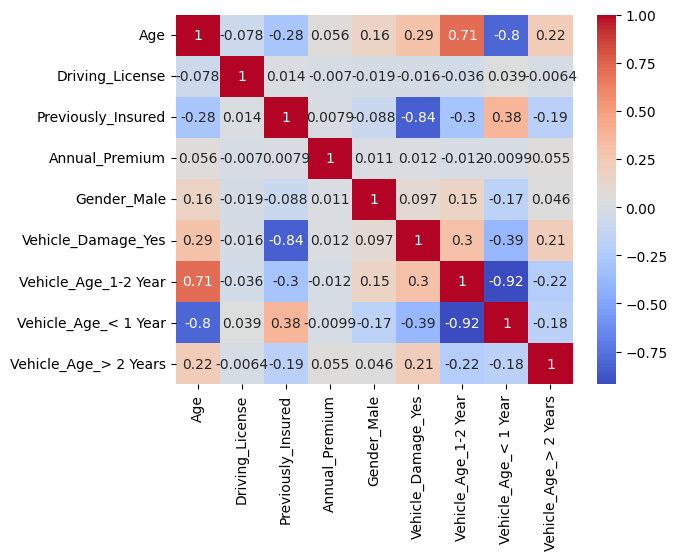

In [16]:
import seaborn as sns
sns.heatmap(data_o.corr(), cmap='coolwarm', annot=True);

In [17]:
data = pd.read_csv('train.csv')
data.Response.value_counts()

Response
0    4384718
1     615282
Name: count, dtype: int64

---

In [18]:
# Разделение на признаки (X) и целевую переменную (y)
X = data_o
y = data['Response']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [19]:
X_train

,Age,Driving_License,Previously_Insured,Annual_Premium,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
813726,0.841011,1,0,0.902056,True,True,False,False,True
341719,-0.159205,1,0,-0.191704,True,True,True,False,False
4270474,-0.892697,1,1,0.525876,False,False,False,True,False
1177681,0.174200,1,0,-0.022066,False,False,True,False,False
1982304,2.107951,1,0,0.817145,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...
88386,-0.025843,1,1,1.059009,True,True,True,False,False
2446250,-1.159421,1,0,0.505180,False,False,False,True,False
3836473,-0.959378,1,1,-0.338461,True,False,False,True,False
1296606,1.107735,1,0,0.289050,True,True,True,False,False


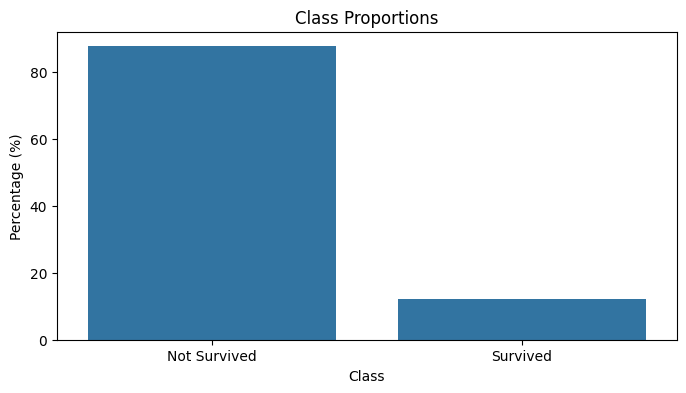

Размер обучающей выборки: (3750000, 9)
Размер тестовой выборки: (1250000, 9)


In [20]:
# Визуализация пропорций классов
class_proportions = y.value_counts(normalize=True)
plt.figure(figsize=(8, 4))
sns.barplot(x=class_proportions.index, y=class_proportions.values * 100)
plt.title('Class Proportions')
plt.xlabel('Class')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

# Проверка результатов
print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

In [21]:
X_train

,Age,Driving_License,Previously_Insured,Annual_Premium,Gender_Male,Vehicle_Damage_Yes,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
813726,0.841011,1,0,0.902056,True,True,False,False,True
341719,-0.159205,1,0,-0.191704,True,True,True,False,False
4270474,-0.892697,1,1,0.525876,False,False,False,True,False
1177681,0.174200,1,0,-0.022066,False,False,True,False,False
1982304,2.107951,1,0,0.817145,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...
88386,-0.025843,1,1,1.059009,True,True,True,False,False
2446250,-1.159421,1,0,0.505180,False,False,False,True,False
3836473,-0.959378,1,1,-0.338461,True,False,False,True,False
1296606,1.107735,1,0,0.289050,True,True,True,False,False


In [22]:
y_train

813726     0
341719     1
4270474    0
1177681    0
1982304    0
          ..
88386      0
2446250    0
3836473    0
1296606    1
1510718    0
Name: Response, Length: 3750000, dtype: int64

---

In [23]:
# 1. Decision Tree
tree_param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [5, 10, 15]}
tree_model = GridSearchCV(DecisionTreeClassifier(random_state=42), tree_param_grid, cv=5)
tree_model.fit(X_train, y_train)
print("Decision Tree Best Params:", tree_model.best_params_)

#2. Random Forest RandomSearchCV
from lightgbm import LGBMClassifier

lgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20],
    'learning_rate': [0.05, 0.1]
}

lgb_model = RandomizedSearchCV(
    LGBMClassifier(
        random_state=42,
        n_jobs=-1,
        verbose=-1
    ),
    lgb_params,
    n_iter=8,
    cv=3,
    n_jobs=1,
    verbose=2
)

lgb_model.fit(X_train, y_train)
print("LightGBM Best Params:", lgb_model.best_params_)

Decision Tree Best Params: {'max_depth': 3, 'min_samples_split': 5}
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ..learning_rate=0.1, max_depth=20, n_estimators=200; total time=   4.2s
[CV] END ..learning_rate=0.1, max_depth=20, n_estimators=200; total time=   4.0s
[CV] END ..learning_rate=0.1, max_depth=20, n_estimators=200; total time=   4.0s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time=   4.0s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time=   4.1s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=200; total time=   4.0s
[CV] END .learning_rate=0.05, max_depth=15, n_estimators=100; total time=   3.2s
[CV] END .learning_rate=0.05, max_depth=15, n_estimators=100; total time=   2.8s
[CV] END .learning_rate=0.05, max_depth=15, n_estimators=100; total time=   3.2s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; total time=   2.5s
[CV] END ..learning_rate=0.1, max_depth=10, n_estimators=100; 


--- Decision Tree ---


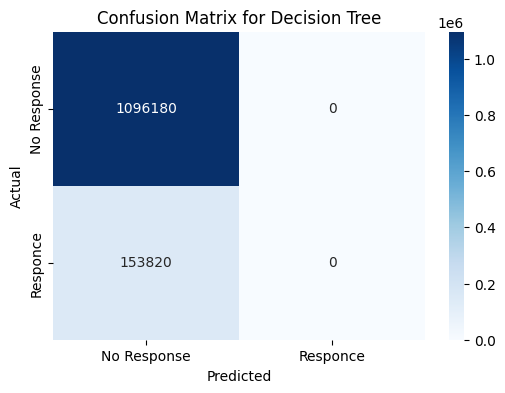

C:\Users\IVAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\IVAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\IVAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classif

              precision    recall  f1-score   support

           0       0.88      1.00      0.93   1096180
           1       0.00      0.00      0.00    153820

    accuracy                           0.88   1250000
   macro avg       0.44      0.50      0.47   1250000
weighted avg       0.77      0.88      0.82   1250000


Feature Importances:
                 Feature    Importance
5     Vehicle_Damage_Yes  7.888343e-01
0                    Age  2.027317e-01
2     Previously_Insured  8.433090e-03
6   Vehicle_Age_1-2 Year  9.061767e-07
1        Driving_License  0.000000e+00
4            Gender_Male  0.000000e+00
3         Annual_Premium  0.000000e+00
7   Vehicle_Age_< 1 Year  0.000000e+00
8  Vehicle_Age_> 2 Years  0.000000e+00

--- Random Forest ---


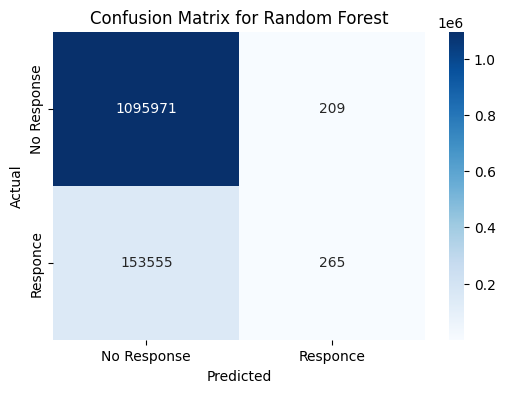

              precision    recall  f1-score   support

           0       0.88      1.00      0.93   1096180
           1       0.56      0.00      0.00    153820

    accuracy                           0.88   1250000
   macro avg       0.72      0.50      0.47   1250000
weighted avg       0.84      0.88      0.82   1250000


Feature Importances:
                 Feature  Importance
3         Annual_Premium        2699
0                    Age        1996
4            Gender_Male         306
5     Vehicle_Damage_Yes         290
6   Vehicle_Age_1-2 Year         286
2     Previously_Insured         186
7   Vehicle_Age_< 1 Year         113
8  Vehicle_Age_> 2 Years          63
1        Driving_License          61


In [28]:
# Функция для оценки модели
def evaluate_model(model, name):
    print(f"\n--- {name} ---")
    y_pred = model.predict(X_test)

    # Матрица ошибок
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Response', 'Responce'], yticklabels=['No Response', 'Responce'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Отчет классификации
    print(classification_report(y_test, y_pred))

    # Важность признаков (для деревьев и LihgtGBM)
    if hasattr(model.best_estimator_, "feature_importances_"):
        feature_importances = model.best_estimator_.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print("\nFeature Importances:")
        print(importance_df.head(10))

# Оценка моделей
evaluate_model(tree_model, "Decision Tree")
evaluate_model(lgb_model, "Random Forest")


In [27]:
import pickle

# Сохранение модели в файл
model_filename = "random_forest_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(tree_model, file)
print(f"Модель сохранена в файл: {model_filename}")

Модель сохранена в файл: random_forest_model.pkl
